# Lecture 2: Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats

## PCA of 3D example data

In [2]:
# create 3D data
e = np.exp(1)
np.random.seed(4)

def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

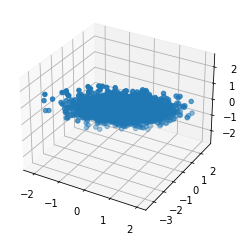

In [3]:
from mpl_toolkits.mplot3d import Axes3D # need this package to plot in 3D
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d");
ax.scatter(a[::10], b[::10], c[::10]);

In [4]:
# create a big matrix to do PCA
Y = np.vstack((a,b,c)).T
print(Y.shape)

(30000, 3)


In [5]:
# perform PCA
pca = PCA()
pca.fit(Y)

PCA(n_components=3)

List of [attributes](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). (Or just do `pca?` in jupyter.)

In [6]:
pca.components_[0,:]

array([-0.33847725, -0.77400604,  0.53511475])

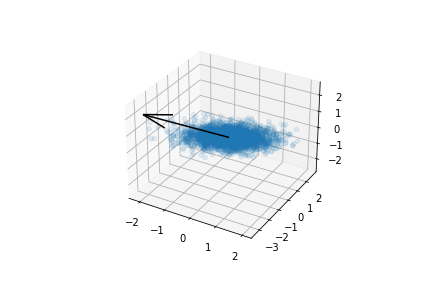

In [22]:
%matplotlib widget
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d");
ax.scatter(a[::10], b[::10], c[::10],alpha=0.1);

# also plotting out the first direction
ax.quiver(0,0,0,pca.components_[0,0],pca.components_[0,1],pca.components_[0,2],color=[0,0,0],length=5)

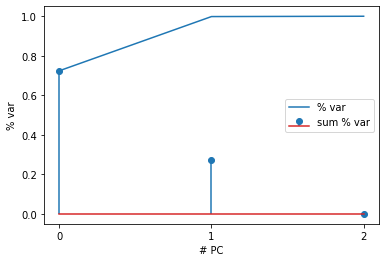

In [33]:
%matplotlib inline
fig,ax = plt.subplots()
ax.stem(pca.explained_variance_ratio_)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.legend(['% var','sum % var'])
ax.set(xticks=range(3),xlabel='# PC',ylabel='% var');

## PCA of spikes

In [36]:
# generate templates
num_timepoints = 50
Sigma = np.zeros((num_timepoints,num_timepoints))
for it in range(num_timepoints):
    for jt in range(num_timepoints):
        Sigma[it,jt] = np.exp(-((it-jt)/5)**2)
temp1 = np.random.multivariate_normal(mean=np.zeros(num_timepoints,), cov=Sigma)
temp2 = np.random.multivariate_normal(mean=np.zeros(num_timepoints,), cov=Sigma)

temp1 -= np.mean(temp1)
temp2 -= np.mean(temp2)
temp2 = temp2 - np.dot(temp1,temp2) * temp1 / np.sum(temp1**2)

# generate time series
num_waveforms = 1000
waveforms = np.zeros((num_waveforms, num_timepoints))
for iform in range(num_waveforms):
    if iform < num_waveforms/4:
        waveforms[iform,:] = temp1 + np.random.normal(size=(num_timepoints,), scale=0.05)
    elif iform < num_waveforms/2:
        waveforms[iform,:] = temp2 + np.random.normal(size=(num_timepoints,), scale=0.05)
    else:
        waveforms[iform,:] = np.random.normal(size=(num_timepoints,),scale=0.05)

In [37]:
waveforms.shape

(1000, 50)

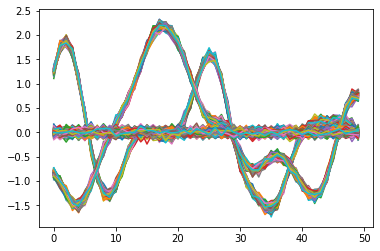

In [38]:
plt.plot(waveforms.T);

In [ ]:
# try to perform PCA on your own